Visualize optimize quadtree binning method

In [1]:
%pip install csep

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csep (from versions: none)
ERROR: No matching distribution found for csep


In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # adjust if needed
if project_root not in sys.path:
    sys.path.append(project_root)

from csep.core.catalogs import CSEPCatalog
from src.preprocessing.load_catalog import load_catalog
from src.binning.quadtree import apply_quadtree_binning
#from src.binning.regional import apply_regional_binning
from src.binning.cartesian_grid import apply_cartesian

In [3]:
filepath = '../data/eq_catalog.csv'
df, original_catalog = load_catalog(filepath)

print("Event Counts:", original_catalog.get_number_of_events())
print("Lat Range:", original_catalog.get_latitudes().min(), "-", original_catalog.get_latitudes().max())
print("Lon Range:", original_catalog.get_longitudes().min(), "-", original_catalog.get_longitudes().max())

Event Counts: 3509
Lat Range: 2.0 - 22.0
Lon Range: 116.3 - 133.0


In [4]:
def plot_events_with_grid(catalog, bounds=None, title="", region_name=""):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([117.0, 130.0, 2.0, 22.0])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # --- Plot earthquakes ---
    ax.scatter(
        catalog.get_longitudes(),
        catalog.get_latitudes(),
        s=catalog.get_magnitudes()**2,
        color='red',
        alpha=0.6,
        label='Earthquakes'
    )

    # --- Plot and print each bin boundary ---
    if bounds:
        print(f"\nBOUNDARIES for {title}:")
        for i, (min_lon, max_lon, min_lat, max_lat) in enumerate(bounds):
            # Rectangle patch
            rect = plt.Rectangle(
                (min_lon, min_lat),
                max_lon - min_lon,
                max_lat - min_lat,
                edgecolor='black',
                facecolor='none',
                linewidth=0.7,
                transform=ccrs.PlateCarree()
            )
            ax.add_patch(rect)

            # Count events inside this bin
            lons = catalog.get_longitudes()
            lats = catalog.get_latitudes()
            in_bin = (
                (lons >= min_lon) & (lons < max_lon) &
                (lats >= min_lat) & (lats < max_lat)
            )
            event_count = in_bin.sum()

            # Text label
            ax.text(
                (min_lon + max_lon) / 2,
                (min_lat + max_lat) / 2,
                f'{event_count}',
                ha='center', va='center',
                fontsize=6,
                transform=ccrs.PlateCarree()
            )

            # --- Print to terminal ---
            print(f"Bin {i+1}:")
            print(f"  Lon: {min_lon:.2f} to {max_lon:.2f}")
            print(f"  Lat: {min_lat:.2f} to {max_lat:.2f}")
            print(f"  Events: {event_count}")

    ax.set_title(f"{title} ({region_name})")
    ax.legend()
    plt.show()


QUADTREE


BOUNDARIES for Quadtree Binning:
Bin 1:
  Lon: 116.30 to 120.47
  Lat: 2.00 to 7.00
  Events: 16
Bin 2:
  Lon: 120.47 to 122.56
  Lat: 2.00 to 4.50
  Events: 32
Bin 3:
  Lon: 122.56 to 124.65
  Lat: 2.00 to 4.50
  Events: 38
Bin 4:
  Lon: 120.47 to 122.56
  Lat: 4.50 to 7.00
  Events: 14
Bin 5:
  Lon: 122.56 to 124.65
  Lat: 4.50 to 7.00
  Events: 124
Bin 6:
  Lon: 116.30 to 120.47
  Lat: 7.00 to 12.00
  Events: 3
Bin 7:
  Lon: 120.47 to 122.56
  Lat: 7.00 to 9.50
  Events: 23
Bin 8:
  Lon: 122.56 to 124.65
  Lat: 7.00 to 9.50
  Events: 73
Bin 9:
  Lon: 120.47 to 122.56
  Lat: 9.50 to 12.00
  Events: 47
Bin 10:
  Lon: 122.56 to 124.65
  Lat: 9.50 to 12.00
  Events: 53
Bin 11:
  Lon: 124.65 to 126.74
  Lat: 2.00 to 4.50
  Events: 207
Bin 12:
  Lon: 126.74 to 128.82
  Lat: 2.00 to 4.50
  Events: 272
Bin 13:
  Lon: 124.65 to 126.74
  Lat: 4.50 to 7.00
  Events: 386
Bin 14:
  Lon: 126.74 to 128.82
  Lat: 4.50 to 7.00
  Events: 246
Bin 15:
  Lon: 128.82 to 133.00
  Lat: 2.00 to 7.00
  Even

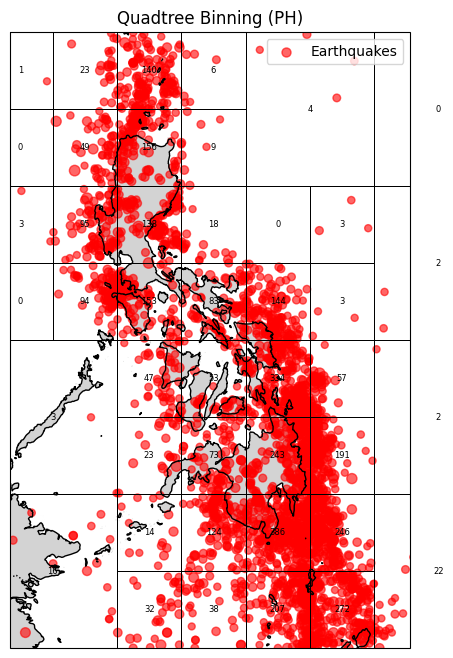

In [ ]:
filtered_qt, region_qt, bounds_qt = apply_quadtree_binning(
    original_catalog, max_depth=3, min_events=100
)
plot_events_with_grid(filtered_qt, bounds_qt, title="Quadtree Binning", region_name="PH")

In [6]:
%pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/19.2 MB 6.7 MB/s eta 0:00:03
   ------- -------------------------------- 3.7/19.2 MB 9.9 MB/s eta 0:00:02
   ------------ --------------------------- 6.0/19.2 MB 10.5 MB/s eta 0:00:02
   ----------------- ---------------------- 8.7/19.2 MB 11.2 MB/s eta 0:00:01
   ----------------------- ---------------- 11.3/19.2 MB 11.6 MB/s eta 0:00:01
   ---------------------------- ----------- 13.9/19.2 MB 11.6 MB/s eta 0:00:01
   ---------------------------------- ----- 16.5/19.2 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 11.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [pyogrio]
   ---------------------------------------- 0/2 [pyogrio]
   ---------------------------------------- 0/2 [pyogrio]
   ---------------------------------------- 0/2 [p


=== PARAMETERS: VeryHighEvent_LowDepth (min_events=150, max_depth=2) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-124.65, Lat 2.00-7.00, Events: 208
Bin  3: Lon 116.30-120.47, Lat 7.00-12.00, Events: 3
Bin  4: Lon 120.47-124.65, Lat 7.00-12.00, Events: 196
Bin  5: Lon 124.65-128.82, Lat 2.00-7.00, Events: 1111
Bin  6: Lon 128.82-133.00, Lat 2.00-7.00, Events: 22
Bin  7: Lon 124.65-128.82, Lat 7.00-12.00, Events: 825
Bin  8: Lon 128.82-133.00, Lat 7.00-12.00, Events: 2
Bin  9: Lon 116.30-120.47, Lat 12.00-17.00, Events: 192
Bin 10: Lon 120.47-124.65, Lat 12.00-17.00, Events: 392
Bin 11: Lon 116.30-120.47, Lat 17.00-22.00, Events: 73
Bin 12: Lon 120.47-124.65, Lat 17.00-22.00, Events: 311
Bin 13: Lon 124.65-128.82, Lat 12.00-17.00, Events: 150
Bin 14: Lon 128.82-133.00, Lat 12.00-17.00, Events: 2
Bin 15: Lon 124.65-128.82, Lat 17.00-22.00, Events: 4
Bin 16: Lon 128.82-133.00, Lat 17.00-22.00, Events: 0
Total bins: 16   Total events in bins: 3507


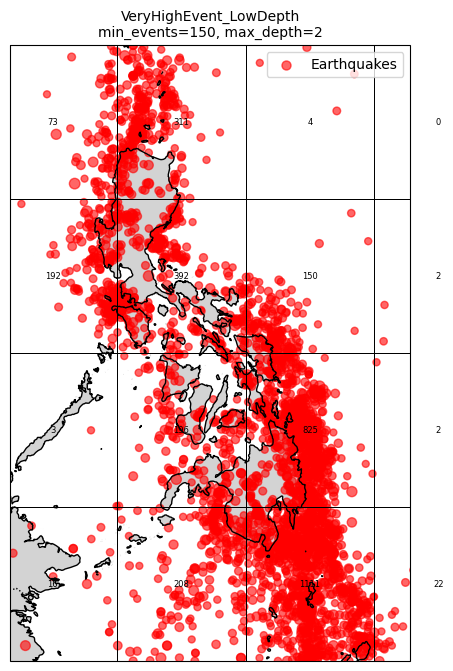

✅ Saved plot: quadtree_VeryHighEvent_LowDepth.png

=== PARAMETERS: HighEvent_LowDepth (min_events=100, max_depth=3) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-122.56, Lat 2.00-4.50, Events: 32
Bin  3: Lon 122.56-124.65, Lat 2.00-4.50, Events: 38
Bin  4: Lon 120.47-122.56, Lat 4.50-7.00, Events: 14
Bin  5: Lon 122.56-124.65, Lat 4.50-7.00, Events: 124
Bin  6: Lon 116.30-120.47, Lat 7.00-12.00, Events: 3
Bin  7: Lon 120.47-122.56, Lat 7.00-9.50, Events: 23
Bin  8: Lon 122.56-124.65, Lat 7.00-9.50, Events: 73
Bin  9: Lon 120.47-122.56, Lat 9.50-12.00, Events: 47
Bin 10: Lon 122.56-124.65, Lat 9.50-12.00, Events: 53
Bin 11: Lon 124.65-126.74, Lat 2.00-4.50, Events: 207
Bin 12: Lon 126.74-128.82, Lat 2.00-4.50, Events: 272
Bin 13: Lon 124.65-126.74, Lat 4.50-7.00, Events: 386
Bin 14: Lon 126.74-128.82, Lat 4.50-7.00, Events: 246
Bin 15: Lon 128.82-133.00, Lat 2.00-7.00, Events: 22
Bin 16: Lon 124.65-126.74, Lat 7.00-9.50, Events: 243
Bin 17: Lon 126.74-128.8

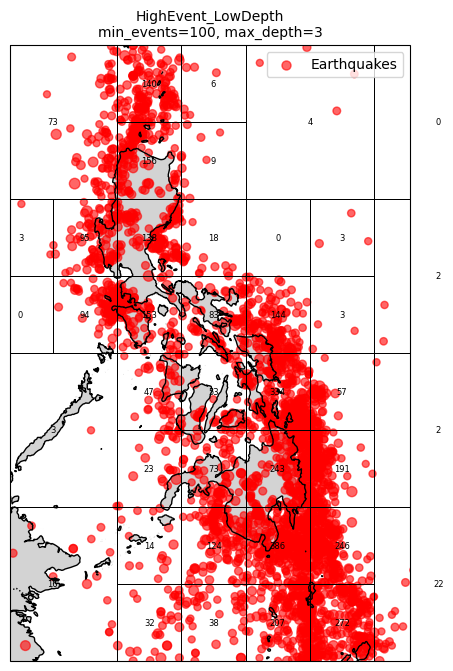

✅ Saved plot: quadtree_HighEvent_LowDepth.png

=== PARAMETERS: MedEvent_MedDepth (min_events=50, max_depth=4) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-122.56, Lat 2.00-4.50, Events: 32
Bin  3: Lon 122.56-124.65, Lat 2.00-4.50, Events: 38
Bin  4: Lon 120.47-122.56, Lat 4.50-7.00, Events: 14
Bin  5: Lon 122.56-123.61, Lat 4.50-5.75, Events: 15
Bin  6: Lon 123.61-124.65, Lat 4.50-5.75, Events: 22
Bin  7: Lon 122.56-123.61, Lat 5.75-7.00, Events: 23
Bin  8: Lon 123.61-124.65, Lat 5.75-7.00, Events: 64
Bin  9: Lon 116.30-120.47, Lat 7.00-12.00, Events: 3
Bin 10: Lon 120.47-122.56, Lat 7.00-9.50, Events: 23
Bin 11: Lon 122.56-123.61, Lat 7.00-8.25, Events: 18
Bin 12: Lon 123.61-124.65, Lat 7.00-8.25, Events: 28
Bin 13: Lon 122.56-123.61, Lat 8.25-9.50, Events: 10
Bin 14: Lon 123.61-124.65, Lat 8.25-9.50, Events: 17
Bin 15: Lon 120.47-122.56, Lat 9.50-12.00, Events: 47
Bin 16: Lon 122.56-123.61, Lat 9.50-10.75, Events: 11
Bin 17: Lon 123.61-124.65, Lat 9.50-

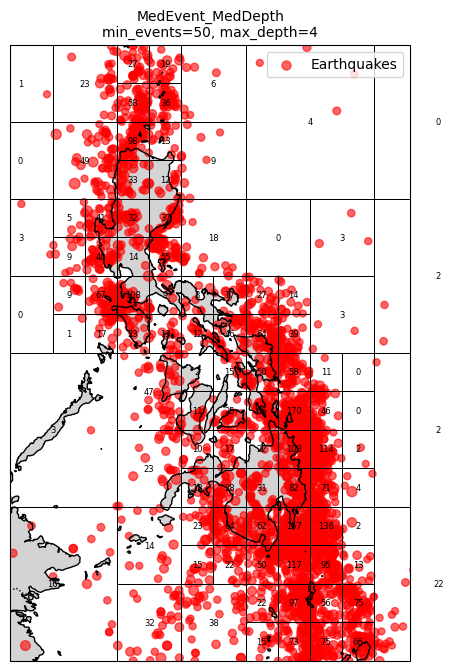

✅ Saved plot: quadtree_MedEvent_MedDepth.png

=== PARAMETERS: LowEvent_HighDepth (min_events=20, max_depth=5) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-121.52, Lat 2.00-3.25, Events: 4
Bin  3: Lon 121.52-122.56, Lat 2.00-3.25, Events: 11
Bin  4: Lon 120.47-121.52, Lat 3.25-4.50, Events: 2
Bin  5: Lon 121.52-122.56, Lat 3.25-4.50, Events: 15
Bin  6: Lon 122.56-123.61, Lat 2.00-3.25, Events: 5
Bin  7: Lon 123.61-124.65, Lat 2.00-3.25, Events: 6
Bin  8: Lon 122.56-123.61, Lat 3.25-4.50, Events: 13
Bin  9: Lon 123.61-124.65, Lat 3.25-4.50, Events: 14
Bin 10: Lon 120.47-122.56, Lat 4.50-7.00, Events: 14
Bin 11: Lon 122.56-123.61, Lat 4.50-5.75, Events: 15
Bin 12: Lon 123.61-124.13, Lat 4.50-5.12, Events: 0
Bin 13: Lon 124.13-124.65, Lat 4.50-5.12, Events: 6
Bin 14: Lon 123.61-124.13, Lat 5.12-5.75, Events: 8
Bin 15: Lon 124.13-124.65, Lat 5.12-5.75, Events: 8
Bin 16: Lon 122.56-123.08, Lat 5.75-6.38, Events: 0
Bin 17: Lon 123.08-123.61, Lat 5.75-6.38, Event

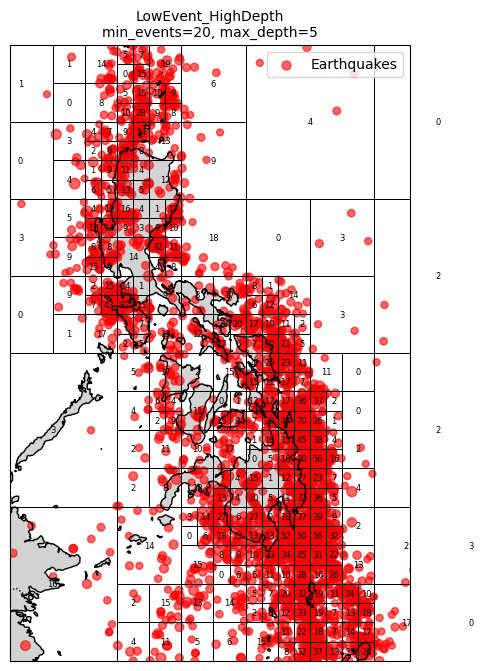

✅ Saved plot: quadtree_LowEvent_HighDepth.png

=== PARAMETERS: VeryLowEvent_VeryHighDepth (min_events=10, max_depth=6) ===
Bin  1: Lon 116.30-118.39, Lat 2.00-4.50, Events: 1
Bin  2: Lon 118.39-120.47, Lat 2.00-4.50, Events: 4
Bin  3: Lon 116.30-118.39, Lat 4.50-7.00, Events: 3
Bin  4: Lon 118.39-120.47, Lat 4.50-7.00, Events: 8
Bin  5: Lon 120.47-121.52, Lat 2.00-3.25, Events: 4
Bin  6: Lon 121.52-122.04, Lat 2.00-2.62, Events: 3
Bin  7: Lon 122.04-122.56, Lat 2.00-2.62, Events: 3
Bin  8: Lon 121.52-122.04, Lat 2.62-3.25, Events: 4
Bin  9: Lon 122.04-122.56, Lat 2.62-3.25, Events: 1
Bin 10: Lon 120.47-121.52, Lat 3.25-4.50, Events: 2
Bin 11: Lon 121.52-122.04, Lat 3.25-3.88, Events: 3
Bin 12: Lon 122.04-122.56, Lat 3.25-3.88, Events: 5
Bin 13: Lon 121.52-122.04, Lat 3.88-4.50, Events: 0
Bin 14: Lon 122.04-122.56, Lat 3.88-4.50, Events: 7
Bin 15: Lon 122.56-123.61, Lat 2.00-3.25, Events: 5
Bin 16: Lon 123.61-124.65, Lat 2.00-3.25, Events: 6
Bin 17: Lon 122.56-123.08, Lat 3.25-3.88, Eve

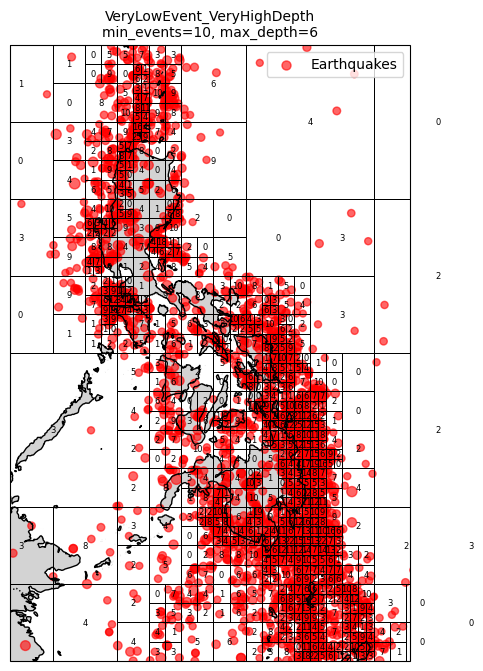

✅ Saved plot: quadtree_VeryLowEvent_VeryHighDepth.png

=== PARAMETERS: HighEvent_HighDepth (min_events=100, max_depth=6) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-122.56, Lat 2.00-4.50, Events: 32
Bin  3: Lon 122.56-124.65, Lat 2.00-4.50, Events: 38
Bin  4: Lon 120.47-122.56, Lat 4.50-7.00, Events: 14
Bin  5: Lon 122.56-123.61, Lat 4.50-5.75, Events: 15
Bin  6: Lon 123.61-124.65, Lat 4.50-5.75, Events: 22
Bin  7: Lon 122.56-123.61, Lat 5.75-7.00, Events: 23
Bin  8: Lon 123.61-124.65, Lat 5.75-7.00, Events: 64
Bin  9: Lon 116.30-120.47, Lat 7.00-12.00, Events: 3
Bin 10: Lon 120.47-122.56, Lat 7.00-9.50, Events: 23
Bin 11: Lon 122.56-124.65, Lat 7.00-9.50, Events: 73
Bin 12: Lon 120.47-122.56, Lat 9.50-12.00, Events: 47
Bin 13: Lon 122.56-124.65, Lat 9.50-12.00, Events: 53
Bin 14: Lon 124.65-125.69, Lat 2.00-3.25, Events: 15
Bin 15: Lon 125.69-126.74, Lat 2.00-3.25, Events: 73
Bin 16: Lon 124.65-125.69, Lat 3.25-4.50, Events: 22
Bin 17: Lon 125.69-126.74

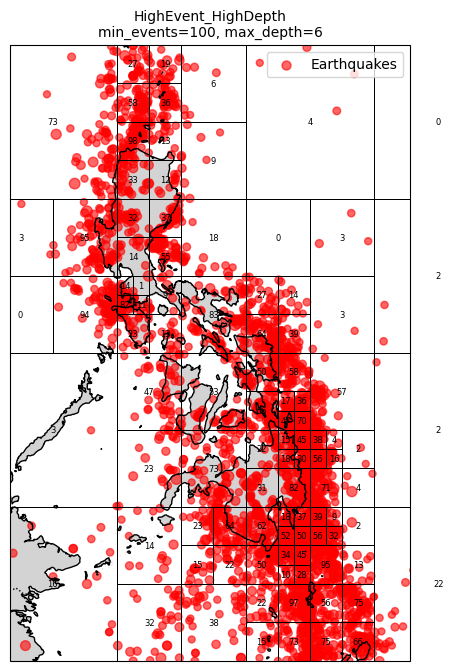

✅ Saved plot: quadtree_HighEvent_HighDepth.png

=== PARAMETERS: LowEvent_LowDepth (min_events=20, max_depth=3) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-122.56, Lat 2.00-4.50, Events: 32
Bin  3: Lon 122.56-124.65, Lat 2.00-4.50, Events: 38
Bin  4: Lon 120.47-122.56, Lat 4.50-7.00, Events: 14
Bin  5: Lon 122.56-124.65, Lat 4.50-7.00, Events: 124
Bin  6: Lon 116.30-120.47, Lat 7.00-12.00, Events: 3
Bin  7: Lon 120.47-122.56, Lat 7.00-9.50, Events: 23
Bin  8: Lon 122.56-124.65, Lat 7.00-9.50, Events: 73
Bin  9: Lon 120.47-122.56, Lat 9.50-12.00, Events: 47
Bin 10: Lon 122.56-124.65, Lat 9.50-12.00, Events: 53
Bin 11: Lon 124.65-126.74, Lat 2.00-4.50, Events: 207
Bin 12: Lon 126.74-128.82, Lat 2.00-4.50, Events: 272
Bin 13: Lon 124.65-126.74, Lat 4.50-7.00, Events: 386
Bin 14: Lon 126.74-128.82, Lat 4.50-7.00, Events: 246
Bin 15: Lon 128.82-130.91, Lat 2.00-4.50, Events: 17
Bin 16: Lon 130.91-133.00, Lat 2.00-4.50, Events: 0
Bin 17: Lon 128.82-130.91, Lat 

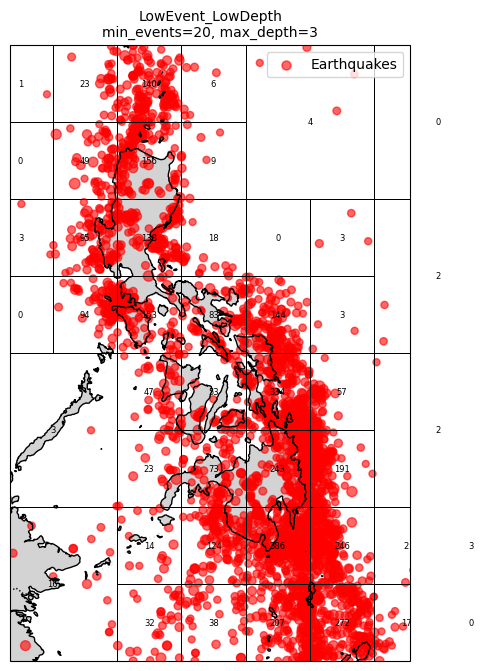

✅ Saved plot: quadtree_LowEvent_LowDepth.png

=== PARAMETERS: VeryLowEvent_LowDepth (min_events=10, max_depth=2) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-124.65, Lat 2.00-7.00, Events: 208
Bin  3: Lon 116.30-120.47, Lat 7.00-12.00, Events: 3
Bin  4: Lon 120.47-124.65, Lat 7.00-12.00, Events: 196
Bin  5: Lon 124.65-128.82, Lat 2.00-7.00, Events: 1111
Bin  6: Lon 128.82-133.00, Lat 2.00-7.00, Events: 22
Bin  7: Lon 124.65-128.82, Lat 7.00-12.00, Events: 825
Bin  8: Lon 128.82-133.00, Lat 7.00-12.00, Events: 2
Bin  9: Lon 116.30-120.47, Lat 12.00-17.00, Events: 192
Bin 10: Lon 120.47-124.65, Lat 12.00-17.00, Events: 392
Bin 11: Lon 116.30-120.47, Lat 17.00-22.00, Events: 73
Bin 12: Lon 120.47-124.65, Lat 17.00-22.00, Events: 311
Bin 13: Lon 124.65-128.82, Lat 12.00-17.00, Events: 150
Bin 14: Lon 128.82-133.00, Lat 12.00-17.00, Events: 2
Bin 15: Lon 124.65-128.82, Lat 17.00-22.00, Events: 4
Bin 16: Lon 128.82-133.00, Lat 17.00-22.00, Events: 0
Total bins:

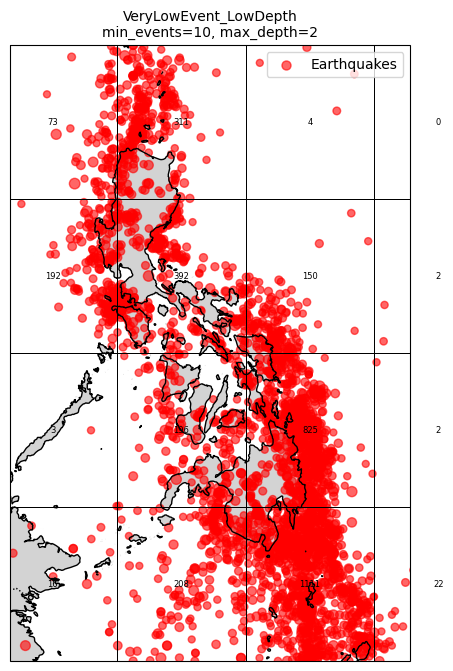

✅ Saved plot: quadtree_VeryLowEvent_LowDepth.png

=== PARAMETERS: MedEvent_HighDepth (min_events=50, max_depth=6) ===
Bin  1: Lon 116.30-120.47, Lat 2.00-7.00, Events: 16
Bin  2: Lon 120.47-122.56, Lat 2.00-4.50, Events: 32
Bin  3: Lon 122.56-124.65, Lat 2.00-4.50, Events: 38
Bin  4: Lon 120.47-122.56, Lat 4.50-7.00, Events: 14
Bin  5: Lon 122.56-123.61, Lat 4.50-5.75, Events: 15
Bin  6: Lon 123.61-124.65, Lat 4.50-5.75, Events: 22
Bin  7: Lon 122.56-123.61, Lat 5.75-7.00, Events: 23
Bin  8: Lon 123.61-124.13, Lat 5.75-6.38, Events: 18
Bin  9: Lon 124.13-124.65, Lat 5.75-6.38, Events: 13
Bin 10: Lon 123.61-124.13, Lat 6.38-7.00, Events: 27
Bin 11: Lon 124.13-124.65, Lat 6.38-7.00, Events: 6
Bin 12: Lon 116.30-120.47, Lat 7.00-12.00, Events: 3
Bin 13: Lon 120.47-122.56, Lat 7.00-9.50, Events: 23
Bin 14: Lon 122.56-123.61, Lat 7.00-8.25, Events: 18
Bin 15: Lon 123.61-124.65, Lat 7.00-8.25, Events: 28
Bin 16: Lon 122.56-123.61, Lat 8.25-9.50, Events: 10
Bin 17: Lon 123.61-124.65, Lat 8.25

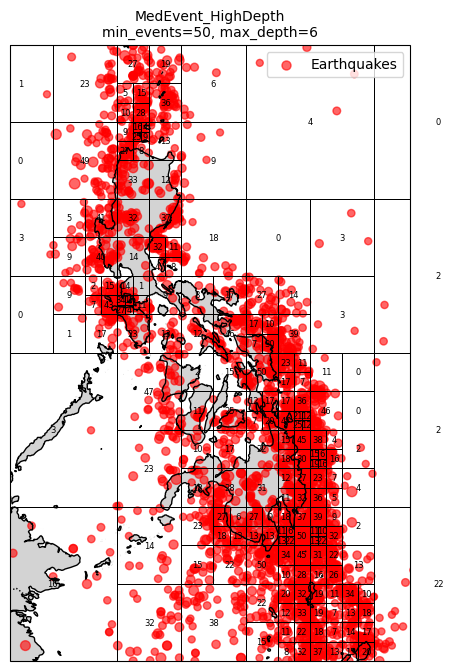

✅ Saved plot: quadtree_MedEvent_HighDepth.png


In [9]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up paths
project_root = os.path.abspath("..")
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from binning.quadtree import apply_quadtree

# Load earthquake catalog
data_csv = os.path.join(project_root, "data", "eq_catalog.csv")
catalog = pd.read_csv(data_csv, encoding="utf-8-sig")
catalog["Date_Time"] = pd.to_datetime(catalog[["Year", "Month", "Day", "Hour", "Minute", "Second"]], errors="coerce")
catalog["year"] = catalog["Date_Time"].dt.year
catalog = catalog.rename(columns={"N_Lat": "latitude", "E_Long": "longitude", "Mag": "magnitude"})

# Plotting function with Cartopy
def plot_events_with_grid(catalog, bounds, label, min_events, max_depth):
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([117.0, 130.0, 2.0, 22.0])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Plot earthquakes
    ax.scatter(
        catalog["longitude"],
        catalog["latitude"],
        s=catalog["magnitude"]**2,
        color='red',
        alpha=0.6,
        label='Earthquakes'
    )

    # Plot and label bins
    for i, (min_lon, max_lon, min_lat, max_lat) in enumerate(bounds):
        rect = patches.Rectangle(
            (min_lon, min_lat),
            max_lon - min_lon,
            max_lat - min_lat,
            edgecolor='black',
            facecolor='none',
            linewidth=0.7,
            transform=ccrs.PlateCarree()
        )
        ax.add_patch(rect)

        sub = catalog.query(
            "longitude >= @min_lon & longitude < @max_lon & "
            "latitude  >= @min_lat  & latitude  < @max_lat"
        )
        event_count = len(sub)

        ax.text(
            (min_lon + max_lon) / 2,
            (min_lat + max_lat) / 2,
            f'{event_count}',
            ha='center', va='center',
            fontsize=6,
            transform=ccrs.PlateCarree()
        )

    ax.set_title(f"{label}\nmin_events={min_events}, max_depth={max_depth}", fontsize=10)
    ax.legend()
    return fig, ax

# Parameter combinations
param_grid = [
    {"label": "VeryHighEvent_LowDepth",    "min_events": 150, "max_depth": 2},
    {"label": "HighEvent_LowDepth",        "min_events": 100, "max_depth": 3},
    {"label": "MedEvent_MedDepth",         "min_events":  50, "max_depth": 4},
    {"label": "LowEvent_HighDepth",        "min_events":  20, "max_depth": 5},
    {"label": "VeryLowEvent_VeryHighDepth","min_events":  10, "max_depth": 6},
    {"label": "HighEvent_HighDepth",       "min_events": 100, "max_depth": 6},
    {"label": "LowEvent_LowDepth",         "min_events":  20, "max_depth": 3},
    {"label": "VeryLowEvent_LowDepth",     "min_events":  10, "max_depth": 2},
    {"label": "MedEvent_HighDepth",        "min_events":  50, "max_depth": 6},
]

# Run for each param set
for p in param_grid:
    me, md, label = p["min_events"], p["max_depth"], p["label"]
    print(f"\n=== PARAMETERS: {label} (min_events={me}, max_depth={md}) ===")

    filtered, qt_root, bounds = apply_quadtree(
        catalog, min_events=me, max_depth=md, min_bin_width=0.2
    )

    total_events = 0
    for i, (min_lon, max_lon, min_lat, max_lat) in enumerate(bounds, start=1):
        sub = catalog.query(
            "longitude >= @min_lon & longitude < @max_lon & "
            "latitude  >= @min_lat  & latitude  < @max_lat"
        )
        ev_count = len(sub)
        total_events += ev_count
        print(f"Bin {i:2d}: Lon {min_lon:.2f}-{max_lon:.2f}, Lat {min_lat:.2f}-{max_lat:.2f}, Events: {ev_count}")

    print(f"Total bins: {len(bounds)}   Total events in bins: {total_events}")

    # Plot & save
    fig, ax = plot_events_with_grid(catalog, bounds, label, me, md)
    out_fn = f"quadtree_{label}.png"
    plt.savefig(out_fn, dpi=150, bbox_inches="tight")
    plt.show()
    print(f"\u2705 Saved plot: {out_fn}")


3x3 GRID

In [1]:
filtered_grid, region_grid, bounds_grid = apply_cartesian(original_catalog)
plot_events_with_grid(filtered_grid, bounds_grid, title="3x3 Grid Binning", region_name="PH")


NameError: name 'apply_cartesian' is not defined